
# Project: Investigating the Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be investigating the Soccer dataset. Yes, I am a soccer fan, and that is the main reason why I chose this dataset. The dataset was not a single file. The file was on the .db format.
The .db file had eight tables in total. This dataset might be an excellent exercise for SQL queries. Since our primary focus is Python, I use the DB Browser to open the file and export all the tables as a .csv file. 
I plan to explore these CSV files using pandas. 

> The soccer dataset consists of 8 tables in total. There are 3 main tables namely: Match, Team_Attributes amd Player_attributes. The Match table contains the useful information like Home team goal, away goal, etc. In order to make this dataset useful we can calculate the total games played by a team, then see how many wins based on the home goal and away goals. 

> The Team_attributes dataset contains some important data regarding the team stats like the number of chances created, shots of target, shots off target. In other words, this data set containts important information about the attacking stats and the defending stats for each team. 

> The Player_attributes table has excellent infomation about the skills/traits for various players from the the 2005 to 2015. 

## Questions to Investigate
>I want to see the top-rated players based on their overall ratings and compare some of my all favorite players like Messi, Ronaldo, Ronaldinho, Rooney, etc. I also want to see if their performance, which directly relates to the overall ratings, got better over time, or declined over time. We will also explore to see what factors contributes the overall ratings of the top best players. 

>Also, I also want to explore the top performing teams and see what attributes are typical for the best teams. I want to know if I can find any correlation between the wins and traits like possession, country, shots on target, etc.  



# <a id='wrangling'></a>
## Data Wrangling

>The data wrangling step is a crucial step where we will be importing all our data into the Jupyter Notebook. Soccer dataset is a challenging data set because of the .db format. As mentioned in the introduction, I have exported all the tables from the .db file to csv using the DB browser. Since we have more than 1 data file (CSV file) to work with, we will first import all the required data and then try to merge as many files as possible using pandas. Firstly, the plan is to clean the dataset, i.e., I want to delete all the unwanted columns. Secondly, we need to check for any missing values in the data set and delete it. At the end of this session, we are planning to have clean data frames for exploration. 

In [1]:
#Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#Opening data
#Data1 - Country
country_df = pd.read_csv('Country.csv')
#Data2 - League
league_df = pd.read_csv('League.csv')
#Data3 - Match
match_df = pd.read_csv('Match.csv')
#Data4 - Player
player_df = pd.read_csv('Player.csv')
#Data5 - Player Attributes
player_attributes_df = pd.read_csv('Player_Attributes.csv')
#Data6 - Team
team_df = pd.read_csv('Team.csv')
#Data7 - Team Attributes 
team_attributes_df = pd.read_csv('Team_Attributes.csv')

In [5]:
#Viewing Data
print(country_df.head())
print(league_df.head())
print(match_df.head())
print(player_df.head())
print(player_attributes_df.head())
print(team_df.head())
print(team_attributes_df.head())

      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...   \
0        492473              9987              9993               1  ...    
1        492474             10000        

In [8]:
#Changing the columns name in Country to merge with League
country_df.rename(columns={'id':'country_id','name':'country_name'},inplace=True)
country_df.head()

,country_id,country_name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [10]:
#Changing the column names in League 
league_df.rename(columns={'id':'league_id','name':'league_name'},inplace=True)
league_df.head()

,league_id,country_id,league_name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [12]:
#Merging Country and League table
Country_league_df = league_df.merge(country_df,how='left',on='country_id')
Country_league_df

,league_id,country_id,league_name,country_name
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [20]:
#Renaming id of match table 
match_df.rename(columns={'id':'match_id'},inplace=True)
match_df.head()

,match_id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [21]:
#Merging Country_league with Match Table 
Country_league_match_df = match_df.merge(Country_league_df,on='league_id',how='left')
Country_league_match_df.head()

,match_id,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country_id_y,league_name,country_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League,Belgium


In [24]:
#Rename team_api_id to home_team_api_id so we can identify the home team 
team_df.rename(columns={'team_api_id':'home_team_api_id'},inplace=True)
team_df.head()

,id,home_team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [25]:
Country_league_match_HomeTeam_df = Country_league_match_df.merge(team_df,on='home_team_api_id',how='left')
Country_league_match_HomeTeam_df.head()

,match_id,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,BSH,BSD,BSA,country_id_y,league_name,country_name,id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.73,3.40,4.20,1,Belgium Jupiler League,Belgium,1,673.0,KRC Genk,GEN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.91,3.25,3.60,1,Belgium Jupiler League,Belgium,3,15005.0,SV Zulte-Waregem,ZUL
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.30,3.20,2.75,1,Belgium Jupiler League,Belgium,5,1750.0,KSV Cercle Brugge,CEB
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.44,3.75,6.50,1,Belgium Jupiler League,Belgium,7,674.0,KAA Gent,GEN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.75,3.30,1.67,1,Belgium Jupiler League,Belgium,9,NaN,FCV Dender EH,DEN


In [26]:
#Rename the home_team_api_id to away_team_api_id in order to retreive the names of the away teams
team_df.rename(columns={'home_team_api_id':'away_team_api_id'},inplace=True)
team_df.head()

,id,away_team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [27]:
Country_league_match_HomeTeam_Away_df = Country_league_match_HomeTeam_df.merge(team_df,on='away_team_api_id',how='left')
Country_league_match_HomeTeam_Away_df.head()

,match_id,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,league_name,country_name,id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,Belgium Jupiler League,Belgium,1,673.0,KRC Genk,GEN,2,675.0,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,Belgium Jupiler League,Belgium,3,15005.0,SV Zulte-Waregem,ZUL,4,2007.0,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,Belgium Jupiler League,Belgium,5,1750.0,KSV Cercle Brugge,CEB,6,229.0,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,Belgium Jupiler League,Belgium,7,674.0,KAA Gent,GEN,8,1747.0,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,Belgium Jupiler League,Belgium,9,NaN,FCV Dender EH,DEN,10,232.0,Standard de Liège,STL


In [30]:
team_df.rename(columns={'away_team_api_id':'team_api_id'},inplace=True)
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [31]:
#Merge Team and Team attributes 
team_attri_df = team_attributes_df.merge(team_df,on='team_api_id',how='left')
team_attri_df.head()

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


In [32]:
#Let do the same for players 
player_attri_df = player_attributes_df.merge(player_df,on='player_api_id',how='left')
player_attri_df.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [ ]:
#the dataframes we will be working with is player_attri_df, team_attri_df, Country_league_match_HomeTeam_Away_df
#Lets clean up the data for these 3 dataframes

In [102]:
#Cleaning Player_attri_df
player_attri_df.head(0)
players_columns = ['player_name','date','birthday','height','weight','overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']
player_clean_df = player_attri_df[players_columns]
#Rows and Columns 
player_clean_df.shape

(183978, 43)

In [103]:
#Check for na's 
print(player_clean_df.isnull().sum())

player_name               0
date                      0
birthday                  0
height                    0
weight                    0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking             

In [104]:
#Let delete the rows missing with overall ratings
player_clean_df.dropna(axis = 0,inplace=True)
player_clean_df.isnull().sum()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


player_name            0
date                   0
birthday               0
height                 0
weight                 0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0


In [55]:
#Cleaning up team_attri_df
team_attri_df.head(0)
columns_teams = [ 'team_long_name','team_short_name','date','buildUpPlaySpeed','buildUpPlaySpeedClass','buildUpPlayDribbling','buildUpPlayDribblingClass','buildUpPlayPassing','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassing','chanceCreationPassingClass','chanceCreationCrossing','chanceCreationCrossingClass','chanceCreationShooting','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressure','defencePressureClass','defenceAggression','defenceAggressionClass','defenceTeamWidth','defenceTeamWidthClass','defenceDefenderLineClass']
team_attri_clean = team_attri_df[columns_teams]
team_attri_clean.head()

,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [59]:
#Checking for missing data
print(team_attri_clean.shape)
team_attri_clean.isnull().sum()

(1458, 24)


team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [62]:
#Since most of the values are missing in buildupPlayDribbing we are going to drop that 
#Proportion missing = 969/1458*100 = 66.5% missing data
team_attri_clean.dropna(axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
#Check again to make sure 
print(team_attri_clean.isnull().sum())
print(team_attri_clean.shape)

team_long_name                    0
team_short_name                   0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64
(1458, 23)


In [77]:
#Cleaning 
columns_Match = Country_league_match_HomeTeam_Away_df.columns[:]
type(columns_Match)
#Just to see all the columns instead of ...
for items in columns_Match:
    print(items)
#apparently there are 126 columns here, let not worry about the betting for right now.

match_id
country_id_x
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_pl

In [78]:
columns_filtered_match = ['match_id','date','league_name','country_name','team_long_name_x','team_short_name_x','team_long_name_y','team_short_name_y','season','stage','home_team_goal','away_team_goal','goal','shoton','shotoff','foulcommit','card','cross','corner','possession']
clean_match_df = Country_league_match_HomeTeam_Away_df[columns_filtered_match]
clean_match_df.head(5)

,match_id,date,league_name,country_name,team_long_name_x,team_short_name_x,team_long_name_y,team_short_name_y,season,stage,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#Lets rename columns Team_long_name_x/y and Team_short_name_x/y

clean_match_df.rename(columns={'team_long_name_x':'Home_Team','team_short_name_x':'Home_Team_Short','team_long_name_y':'Away_Team','team_short_name_y':'Away_Team_Short'},inplace=True)
clean_match_df.head(5)

/Users/Sanjay/Library/Python/3.6/lib/python/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,match_id,date,league_name,country_name,Home_Team,Home_Team_Short,Away_Team,Away_Team_Short,season,stage,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#Check for missing Values 
print(clean_match_df.shape)
clean_match_df.isnull().sum()

(25979, 20)


match_id               0
date                   0
league_name            0
country_name           0
Home_Team              0
Home_Team_Short        0
Away_Team              0
Away_Team_Short        0
season                 0
stage                  0
home_team_goal         0
away_team_goal         0
goal               11762
shoton             11762
shotoff            11762
foulcommit         11762
card               11762
cross              11762
corner             11762
possession         11762
dtype: int64

In [ ]:
#As we can see there are 11762 missing values the last few columns 
#I'm just going to keep it because when i analyse the top teams I want to see if the factors like shoton, corner or possession related to the win

# <a id='eda'></a>
## Exploratory Data Analysis


### Players Rating Comparison

In [105]:
#Changing birthdate to datetime 
pd.to_datetime(player_clean_df['date'])
player_clean_df.info()
player_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 43 columns):
player_name            180354 non-null object
date                   180354 non-null object
birthday               180354 non-null object
height                 180354 non-null float64
weight                 180354 non-null int64
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball

,player_name,date,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016-02-18 00:00:00,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,2015-11-19 00:00:00,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,2015-09-21 00:00:00,1992-02-29 00:00:00,182.88,187,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,2015-03-20 00:00:00,1992-02-29 00:00:00,182.88,187,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,2007-02-22 00:00:00,1992-02-29 00:00:00,182.88,187,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [94]:
#Let analyse what is the mean height and weight for the data set 
player_clean_df.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,181.877895,168.774593,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,6.398588,15.098388,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [ ]:
#We see that the mean height for the dataset is 181.87 cms and mean weight for the dataset is 167.77 lbs.

In [101]:
#Players with the highest overall ratings all time 
player_clean_df.sort_values(by=['overall_rating'],ascending=False,kind='quicksort',inplace=True)
player_clean_df.head(10) #Just to check that the sort worked 
player_clean_df.groupby('player_name')['overall_rating'].mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


player_name
Aaron Appindangoye             63.600000
Aaron Cresswell                66.969697
Aaron Doran                    67.000000
Aaron Galindo                  69.086957
Aaron Hughes                   73.240000
Aaron Hunt                     77.259259
Aaron Kuhl                     60.571429
Aaron Lennon                   79.769231
Aaron Lennox                   48.000000
Aaron Meijers                  67.052632
Aaron Mokoena                  71.625000
Aaron Mooy                     66.285714
Aaron Muirhead                 62.250000
Aaron Niguez                   66.925926
Aaron Ramsey                   78.500000
Aaron Splaine                  54.625000
Aaron Taylor-Sinclair          62.611111
Aaron Wilbraham                61.772727
Aatif Chahechouhe              69.375000
Abdelaziz Barrada              71.857143
Abdelhamid El Kaoutari         68.285714
Abdelkader Ghezzal             68.692308
Abdellah Zoubir                59.000000
Abdelmalek El Hasnaoui         63.000000
Abde

In [413]:
#As I mentioned before I want to check out how the overall ratings of my favorite players increased or decreased over the years.
#Lets First examine Messi and C.Ronaldo

### MESSI VS RONALDO

In [110]:
#Messi Data
messi_df = player_clean_df.query('player_name == "Lionel Messi"')
print(messi_df.shape)
ronaldo_df = player_clean_df.query('player_name == "Cristiano Ronaldo"')
print(ronaldo_df.shape)

(26, 43)
(25, 43)


In [149]:
#Lets plot their ratings over the years
#used help from stack overflow for 2 bar graphs at the same time using plt (I do know how to plot 1 bar graph using plt from the lectures)
messi_df['date'] = messi_df['date'].apply(lambda x:x[:10])
ronaldo_df['date'] = ronaldo_df['date'].apply(lambda x:x[:10])
messi_df.sort_values(by='date',ascending=True,kind='quicksort',inplace=True)
ronaldo_df.sort_values(by='date',ascending=True,kind='quicksort',inplace=True)
labels_messi = messi_df['date']
heights_messi = messi_df['overall_rating']
labels_ronado = ronaldo_df['date']
heights_ronaldo = ronaldo_df['overall_rating']
print(labels_messi)
print(labels_ronado)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

102507    2007-02-22
102506    2007-08-30
102505    2008-08-30
102504    2009-02-22
102503    2009-08-30
102502    2010-02-22
102501    2010-08-30
102500    2011-02-22
102499    2011-08-30
102498    2012-02-22
102497    2012-08-31
102496    2013-02-15
102495    2013-03-08
102494    2013-03-22
102493    2013-09-20
102492    2013-11-15
102491    2014-04-25
102490    2014-09-18
102489    2014-10-17
102488    2015-01-23
102487    2015-02-20
102486    2015-03-13
102485    2015-06-26
102484    2015-09-21
102483    2015-10-16
102482    2015-12-17
Name: date, dtype: object
33354    2007-02-22
33353    2007-08-30
33352    2008-08-30
33351    2009-02-22
33350    2009-08-30
33349    2010-02-22
33348    2010-08-30
33347    2011-02-22
33346    2011-08-30
33345    2012-02-22
33344    2012-08-31
33343    2013-02-15
33342    2013-03-01
33341    2013-03-08
33340    2013-03-22
33339    2013-09-20
33338    2014-01-17
33337    2014-02-07
33336    2014-09-18
33335    2014-10-31
33334    2015-04-17
33333   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


([<matplotlib.axis.XTick at 0x16a282b38>,
 <a list of 26 Text xticklabel objects>)

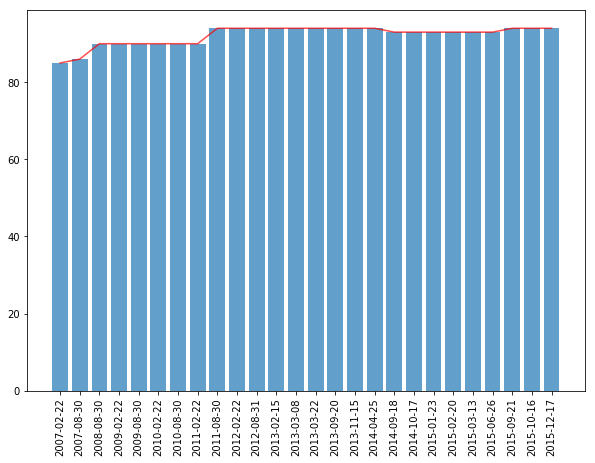

In [167]:
#one thing I noticed here is the that the dates are different and hence it is going to be hard to group them in one graph 
#messi Graph seperate
plt.figure(figsize=(10, 7)) 
plt.plot(labels_messi,heights_messi,alpha = 0.7,color = 'red')
plt.bar(labels_messi,heights_messi,alpha = 0.7)
plt.xticks(labels_messi, rotation='vertical')

In [ ]:
#From the above graph we can observe the following: 
# 1. Messi performance increased from 2007 and reached its peak during 2012 and 2013. 
# 2. There was slight degredation during 2014 - early 2015
# 3. Messi continued to increase his performance from mid 2015.

([<matplotlib.axis.XTick at 0x16a57b668>,
 <a list of 25 Text xticklabel objects>)

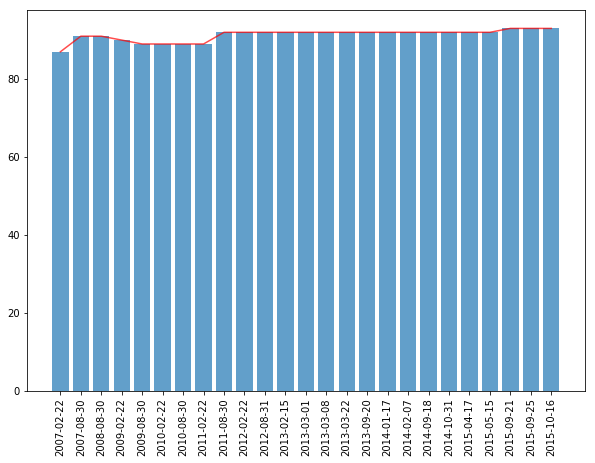

In [168]:
#Ronaldo's Data
plt.figure(figsize=(10, 7)) 
plt.plot(labels_ronado,heights_ronaldo,alpha = 0.7,color = 'red')
plt.bar(labels_ronado,heights_ronaldo,alpha = 0.7)
plt.xticks(labels_ronado, rotation='vertical')

In [ ]:
#From the above graph we can see the following:
# 1. Initially Ronaldo's performance increase and had a dip around the 2010 2011
# 2. Ronaldo's performance increase and was steady until 2015
# 3. Ronado's performance increased further in end of 2015.

In [177]:
#Comparison of traits of Ronaldo and Messi 
print(messi_df.columns)
print(ronaldo_df.columns)
#Lets calculate the mean of the traits in order to compare
messi_mean = messi_df.mean()
ronaldo_mean = ronaldo_df.mean()
print(messi_mean)
print(ronaldo_mean)

Index(['player_name', 'date', 'birthday', 'height', 'weight', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')
Index(['player_name', 'date', 'birthday', 'height', 'weight', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_acc

In [186]:
messi_mean.to_frame()
type(messi_mean)
ronaldo_mean.to_frame()
type(ronaldo_mean)
#Converting Series to data frame
df_messi = pd.DataFrame({'Traits':messi_mean.index,'Mean':messi_mean.values})
df_ronaldo = pd.DataFrame({'Traits':ronaldo_mean.index,'Mean':ronaldo_mean.values})

In [229]:
#plt.subplot()
#plt.figure(figsize=(7,7))
labels = df_messi['Traits']
messi_values = df_messi['Mean']
ronaldo_values = df_ronaldo['Mean']

In [256]:
traits_df = df_messi.merge(df_ronaldo,on='Traits',how='left')
traits_df

,Mean_x,Traits,Mean_y
0,170.180000,height,185.42
1,159.000000,weight,176.00
2,92.192308,overall_rating,91.28
3,95.230769,potential,93.48
4,83.346154,crossing,83.88
5,92.230769,finishing,91.12
6,69.269231,heading_accuracy,85.52
7,88.807692,short_passing,82.28
8,87.538462,volleys,85.56
9,96.461538,dribbling,92.64


In [257]:
traits_df.rename(columns={'Mean_x':'Messi_Mean','Mean_y':'Ronaldo_Mean'},inplace=True)
traits_df.head()

,Messi_Mean,Traits,Ronaldo_Mean
0,170.180000,height,185.42
1,159.000000,weight,176.00
2,92.192308,overall_rating,91.28
3,95.230769,potential,93.48
4,83.346154,crossing,83.88


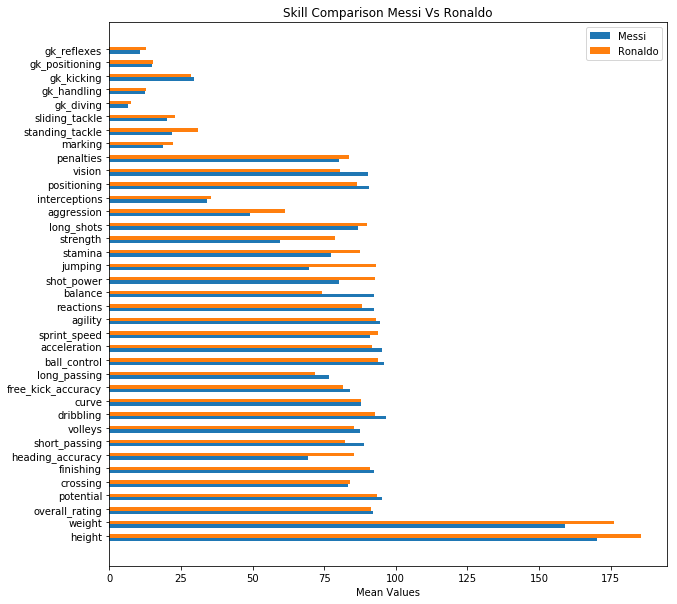

In [294]:
N = len(traits_df)
messi_score = traits_df['Messi_Mean']
ronaldo_score = traits_df['Ronaldo_Mean']
plt.figure(figsize=(10,10))

ind = np.arange(N) 
width = 0.25       
plt.barh(ind, messi_score, width, label='Messi')
plt.barh(ind + width, ronaldo_score, width,
    label='Ronaldo')

plt.xlabel('Mean Values')
plt.title('Skill Comparison Messi Vs Ronaldo')

plt.yticks(ind + width , traits_df['Traits'])
plt.legend(loc='best')
plt.show()

In [295]:
#From the above graph we can note the following:
#1. C.Ronaldo is taller than Messi
#2. C.Ronaldo is heavier than Messi
#3. Messi beats ronaldo in almost every ball skill except for heading accuracy
#4. C.Ronaldo beat Messi in almost every physical trait expect for vision and positioning

### BEST PLAYERS ANALYSIS

In [296]:
#It also makes sense to see what traits are leading to Elite players zone 
#Lets take all the players with overall >= 90
best_players_df = player_clean_df.query('overall_rating >=90 ')
best_players_df.head()

,player_name,date,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
6531,Alessandro Nesta,2007-08-30 00:00:00,1976-03-19 00:00:00,187.96,174,91.0,92.0,right,medium,high,...,76.0,92.0,93.0,95.0,87.0,7.0,21.0,34.0,21.0,21.0
6532,Alessandro Nesta,2007-02-22 00:00:00,1976-03-19 00:00:00,187.96,174,91.0,92.0,right,medium,high,...,76.0,92.0,93.0,95.0,87.0,7.0,6.0,34.0,12.0,12.0
12781,Andres Iniesta,2013-06-07 00:00:00,1984-05-11 00:00:00,170.18,150,90.0,92.0,right,high,medium,...,93.0,65.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12782,Andres Iniesta,2013-05-24 00:00:00,1984-05-11 00:00:00,170.18,150,90.0,90.0,right,high,medium,...,93.0,65.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12783,Andres Iniesta,2013-05-17 00:00:00,1984-05-11 00:00:00,170.18,150,90.0,90.0,right,high,medium,...,93.0,65.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0


In [298]:
best_players_df.shape

(122, 43)

In [302]:
bestplayer_mean = best_players_df.groupby('player_name').mean()
type(bestplayer_mean)

pandas.core.frame.DataFrame

In [303]:
bestplayer_mean.head()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Alessandro Nesta,187.96,174,91.000000,92.000000,42.000000,24.000000,93.000000,54.000000,37.000000,52.000000,...,76.000000,92.0,93.0,95.000000,87.000000,7.0,13.5,34.00,16.50,16.5
Andres Iniesta,170.18,150,90.222222,92.222222,85.000000,73.111111,54.000000,95.000000,74.000000,90.777778,...,93.000000,65.0,57.0,57.000000,56.000000,6.0,13.0,6.00,13.00,7.0
Arjen Robben,180.34,176,90.000000,90.166667,80.833333,84.833333,51.833333,85.666667,85.666667,93.166667,...,84.333333,80.5,29.0,25.666667,25.833333,10.0,8.0,11.00,5.00,15.0
Cristiano Ronaldo,185.42,176,91.950000,93.550000,83.950000,92.400000,85.750000,82.200000,85.700000,92.450000,...,80.800000,84.4,22.5,31.000000,23.000000,7.3,12.5,23.55,15.05,12.5
David Trezeguet,190.50,176,90.000000,92.000000,62.000000,93.000000,94.000000,72.000000,89.000000,87.000000,...,66.000000,94.0,13.0,19.000000,26.000000,13.0,11.0,32.00,6.00,10.0


In [334]:
bestplayer_mean.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,181.821667,176.62500,90.548843,91.846412,64.834144,68.200463,61.032986,73.880903,68.616204,74.332407,...,78.858449,81.572222,33.284722,39.388889,35.278356,23.745139,25.671296,45.581944,26.189583,26.206019
std,7.816853,17.50978,0.766057,1.491096,26.198162,31.571069,24.476367,23.269958,29.145968,29.000459,...,13.960758,11.776027,24.097764,24.154041,24.511517,30.939636,29.330391,31.657108,30.725496,29.929546
min,170.180000,148.00000,90.000000,90.000000,11.000000,2.000000,12.000000,21.000000,7.000000,9.000000,...,51.000000,37.000000,8.000000,13.000000,9.000000,4.000000,6.000000,6.000000,5.000000,5.000000
25%,175.260000,159.00000,90.000000,90.416667,52.312500,38.000000,50.000000,66.375000,63.250000,71.500000,...,69.000000,80.000000,18.437500,21.895833,19.843750,7.225000,11.750000,14.250000,9.000000,10.000000
50%,182.880000,176.00000,90.111111,92.000000,76.500000,84.416667,64.000000,84.000000,84.333333,88.000000,...,83.666667,84.125000,22.250000,30.000000,26.000000,10.250000,13.250000,38.125000,15.000000,12.250000
75%,187.960000,185.50000,91.000000,92.416667,83.456250,91.000000,76.250000,89.156250,87.125000,92.625000,...,89.302083,87.000000,36.250000,48.250000,43.250000,14.250000,17.500000,80.312500,17.875000,18.625000
max,195.580000,209.00000,92.750000,95.375000,92.000000,95.000000,95.000000,97.000000,93.000000,97.000000,...,97.000000,94.000000,93.000000,95.000000,87.000000,93.500000,92.000000,91.333333,95.000000,95.000000


In [ ]:
#This gives an overall idea of what the is the approximate values of each skill for the best players in the data set/

In [359]:
pd.set_option('display.max_columns', 40)
print(bestplayer_mean.corr().head(3))

                  height    weight  overall_rating  potential  crossing  \
height          1.000000  0.841747       -0.086175  -0.138698 -0.517950   
weight          0.841747  1.000000       -0.103758  -0.281180 -0.466793   
overall_rating -0.086175 -0.103758        1.000000   0.680426 -0.166659   

                finishing  heading_accuracy  short_passing   volleys  \
height          -0.265393          0.072124      -0.467709 -0.317454   
weight          -0.276496         -0.058894      -0.388938 -0.289717   
overall_rating  -0.153158         -0.073836      -0.217056 -0.223732   

                dribbling     curve  free_kick_accuracy  long_passing  \
height          -0.436346 -0.468033           -0.385636     -0.354794   
weight          -0.447216 -0.411620           -0.372575     -0.120539   
overall_rating  -0.187523 -0.143864            0.078320      0.145771   

                ball_control  acceleration  sprint_speed   agility  reactions  \
height             -0.449503     -0.

Text(0.5,1,'Overall Ratings vs Potential of the best Players')

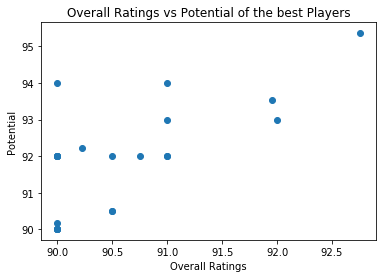

In [366]:
#Here we are trying to find how the overall rating of the best player is related to certain skills. We are trying to find some correlations
#From the above we can see that 
#1. Overall ratings is correlated to potential. (possitive correlation)
plt.scatter(bestplayer_mean['overall_rating'],bestplayer_mean['potential'])
plt.xlabel('Overall Ratings')
plt.ylabel('Potential')
plt.title('Overall Ratings vs Potential of the best Players')

### BEST TEAM ANALYSIS

In [370]:
#let explore the match and the team datasets 

clean_match_df.head()

,match_id,date,league_name,country_name,Home_Team,Home_Team_Short,Away_Team,Away_Team_Short,season,stage,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
#Lets add a new columns WINS i.e if the home team had more goals than away teams then home team won, if away team had more goals than the home team then the away teams won. If they are equal then there is a tie

def outcome (row):
   if row['home_team_goal'] > row['away_team_goal']:
      return 'Home Team Won'
   if row['home_team_goal'] < row['away_team_goal']:
      return 'Home Team Lost'
   return 'Draw'
clean_match_df['Outcome'] = clean_match_df.apply (lambda row: outcome(row), axis=1)
clean_match_df.head()
#This tells us which team won the game i.e outcome of the match whether it is tied or we had a winner.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,match_id,date,league_name,country_name,Home_Team,Home_Team_Short,Away_Team,Away_Team_Short,season,stage,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,Outcome
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draw
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draw
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Lost
3,4,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Won
4,5,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Lost


In [399]:
#Lets examine the teams and their win counts, loss counts and draw counts 
#Total Matches Played by all the teams 
clean_match_df.groupby('Home_Team')['Outcome'].count()

Home_Team
1. FC Kaiserslautern         34
1. FC Köln                  102
1. FC Nürnberg               85
1. FSV Mainz 05             119
AC Ajaccio                   57
AC Arles-Avignon             19
AC Bellinzona                54
ADO Den Haag                136
AJ Auxerre                   76
AS Monaco                   114
AS Nancy-Lorraine            95
AS Saint-Étienne            152
AZ                          136
Aberdeen                    152
Académica de Coimbra        124
Ajax                        136
Amadora                      15
Angers SCO                   19
Arka Gdynia                  45
Arsenal                     152
Aston Villa                 152
Atalanta                    132
Athletic Club de Bilbao     152
Atlético Madrid             152
BSC Young Boys              143
Bari                         38
Bayer 04 Leverkusen         136
Beerschot AC                 76
Birmingham City              38
Blackburn Rovers             76
                           ...

In [407]:
#As we can see, it is quite difficult to pull the number of matches played, no of wins and no of losses from the Outcome columns so I'm going to introduce 3 other columns to tackle this issue

In [414]:
#We will create 3 functions. Each of them will be applied to seperate columns in order for us to calculate the no of matched player, no of wins and no of losses. 
def outcome_wins (row):
   if row['Outcome'] == 'Home Team Won':
      return 'WON'
clean_match_df['WINS'] = clean_match_df.apply (lambda row: outcome_wins(row), axis=1)
clean_match_df.head()
def outcome_lost (row):
   if row['Outcome'] == 'Home Team Lost':
      return 'LOST'
clean_match_df['LOST'] = clean_match_df.apply (lambda row: outcome_lost(row), axis=1)
def outcome_tied (row):
   if row['Outcome'] == 'Draw':
      return 'TIE'
clean_match_df['DRAW'] = clean_match_df.apply (lambda row: outcome_tied(row), axis=1)
clean_match_df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,match_id,date,league_name,country_name,Home_Team,Home_Team_Short,Away_Team,Away_Team_Short,season,stage,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,Outcome,WINS,LOST,DRAW
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draw,None,None,TIE
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draw,None,None,TIE
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Lost,None,LOST,None
3,4,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Won,WON,None,None
4,5,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Team Lost,None,LOST,None


In [410]:
#Now Lets try to count again 
#This gives us number of wins for each team
clean_match_df.groupby('Home_Team')['WINS'].count()

Home_Team
1. FC Kaiserslautern          8
1. FC Köln                   32
1. FC Nürnberg               30
1. FSV Mainz 05              55
AC Ajaccio                   16
AC Arles-Avignon              2
AC Bellinzona                17
ADO Den Haag                 50
AJ Auxerre                   31
AS Monaco                    53
AS Nancy-Lorraine            30
AS Saint-Étienne             75
AZ                           82
Aberdeen                     67
Académica de Coimbra         35
Ajax                        103
Amadora                       7
Angers SCO                    6
Arka Gdynia                  16
Arsenal                      97
Aston Villa                  45
Atalanta                     55
Athletic Club de Bilbao      80
Atlético Madrid             103
BSC Young Boys               85
Bari                         13
Bayer 04 Leverkusen          76
Beerschot AC                 30
Birmingham City              14
Blackburn Rovers             29
                           ...

In [411]:
#This gives us number of loss for each team
clean_match_df.groupby('Home_Team')['LOST'].count()

Home_Team
1. FC Kaiserslautern        15
1. FC Köln                  39
1. FC Nürnberg              34
1. FSV Mainz 05             35
AC Ajaccio                  22
AC Arles-Avignon            11
AC Bellinzona               24
ADO Den Haag                47
AJ Auxerre                  18
AS Monaco                   22
AS Nancy-Lorraine           36
AS Saint-Étienne            37
AZ                          28
Aberdeen                    47
Académica de Coimbra        41
Ajax                         9
Amadora                      4
Angers SCO                   5
Arka Gdynia                 17
Arsenal                     21
Aston Villa                 57
Atalanta                    42
Athletic Club de Bilbao     41
Atlético Madrid             25
BSC Young Boys              24
Bari                        15
Bayer 04 Leverkusen         26
Beerschot AC                21
Birmingham City              7
Blackburn Rovers            26
                            ..
UD Almería                  3

In [415]:
#This gives us number of loss for each team
clean_match_df.groupby('Home_Team')['DRAW'].count()

Home_Team
1. FC Kaiserslautern        11
1. FC Köln                  31
1. FC Nürnberg              21
1. FSV Mainz 05             29
AC Ajaccio                  19
AC Arles-Avignon             6
AC Bellinzona               13
ADO Den Haag                39
AJ Auxerre                  27
AS Monaco                   39
AS Nancy-Lorraine           29
AS Saint-Étienne            40
AZ                          26
Aberdeen                    38
Académica de Coimbra        48
Ajax                        24
Amadora                      4
Angers SCO                   8
Arka Gdynia                 12
Arsenal                     34
Aston Villa                 50
Atalanta                    35
Athletic Club de Bilbao     31
Atlético Madrid             24
BSC Young Boys              34
Bari                        10
Bayer 04 Leverkusen         34
Beerschot AC                25
Birmingham City             17
Blackburn Rovers            21
                            ..
UD Almería                  3

In [470]:
#Now we just have to store this counts into a dataframe and do the analysis on that.
win_df = pd.DataFrame(clean_match_df.groupby('Home_Team')['WINS'].count())
loss_df = pd.DataFrame(clean_match_df.groupby('Home_Team')['LOST'].count())
tie_df = pd.DataFrame(clean_match_df.groupby('Home_Team')['DRAW'].count())
win_df.head(5)

,WINS
Home_Team,
1. FC Kaiserslautern,8
1. FC Köln,32
1. FC Nürnberg,30
1. FSV Mainz 05,55
AC Ajaccio,16


In [475]:
win_df =pd.DataFrame(clean_match_df.groupby('Home_Team')['WINS'].count())
loss_df = pd.DataFrame(clean_match_df.groupby('Home_Team')['LOST'].count())
tie_df = pd.DataFrame(clean_match_df.groupby('Home_Team')['DRAW'].count())
win_df.head(5)

,WINS
Home_Team,
1. FC Kaiserslautern,8
1. FC Köln,32
1. FC Nürnberg,30
1. FSV Mainz 05,55
AC Ajaccio,16


In [491]:
#The Home_Team column is not accessible so lets write it to csv and open it again
win_df.to_csv('win_df.csv')
loss_df.to_csv('loss_df.csv')
tie_df.to_csv('tie_df.csv')

In [492]:
win_df1 = pd.read_csv('win_df.csv')
loss_df1 = pd.read_csv('loss_df.csv')
tie_df1 = pd.read_csv('tie_df.csv')
win_df1.head(2)
loss_df1.head(2)
tie_df1.head(2)

,Home_Team,DRAW
0,1. FC Kaiserslautern,11
1,1. FC Köln,31


In [493]:
#Lets merge now
win_loss_df = win_df1.merge(loss_df1, on='Home_Team',how='left')

In [494]:
stats_df = win_loss_df.merge(tie_df1,on='Home_Team',how='left')

In [495]:
stats_df.head()

,Home_Team,WINS,LOST,DRAW
0,1. FC Kaiserslautern,8,15,11
1,1. FC Köln,32,39,31
2,1. FC Nürnberg,30,34,21
3,1. FSV Mainz 05,55,35,29
4,AC Ajaccio,16,22,19


In [496]:
#Total Matches Played
stats_df['Matches'] = stats_df['WINS'] + stats_df['LOST'] + stats_df['DRAW']
stats_df.head()

,Home_Team,WINS,LOST,DRAW,Matches
0,1. FC Kaiserslautern,8,15,11,34
1,1. FC Köln,32,39,31,102
2,1. FC Nürnberg,30,34,21,85
3,1. FSV Mainz 05,55,35,29,119
4,AC Ajaccio,16,22,19,57


In [497]:
#Now lets calculate the win percentage for every team
stats_df['Win_Percentage'] = (stats_df['WINS']/stats_df['Matches'])*100
stats_df.head()

,Home_Team,WINS,LOST,DRAW,Matches,Win_Percentage
0,1. FC Kaiserslautern,8,15,11,34,23.529412
1,1. FC Köln,32,39,31,102,31.372549
2,1. FC Nürnberg,30,34,21,85,35.294118
3,1. FSV Mainz 05,55,35,29,119,46.218487
4,AC Ajaccio,16,22,19,57,28.070175


In [498]:
stats_df.sort_values(by=['Win_Percentage'],ascending=False,kind='quicksort',inplace=True)
stats_df.head(10)

,Home_Team,WINS,LOST,DRAW,Matches,Win_Percentage
75,FC Barcelona,131,9,12,152,86.184211
211,Real Madrid CF,129,12,11,152,84.868421
232,SL Benfica,102,7,15,124,82.258065
89,FC Porto,102,6,16,124,82.258065
77,FC Bayern Munich,109,13,14,136,80.147059
49,Celtic,120,9,23,152,78.947368
184,PSV,105,13,18,136,77.205882
162,Manchester United,116,20,16,152,76.315789
15,Ajax,103,9,24,136,75.735294
205,RSC Anderlecht,79,6,21,106,74.528302


In [ ]:
#From above we can see that FC Barcelona has the highest win percentage of 86.18% followed by Read Madrid with 84.87%

In [505]:
team_attri_clean.rename(columns={'team_long_name':'Home_Team'},inplace=True)
team_attri_clean

/Users/Sanjay/Library/Python/3.6/lib/python/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Home_Team,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,Aberdeen,ABE,2012-02-22 00:00:00,58,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,Aberdeen,ABE,2013-09-20 00:00:00,62,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,Aberdeen,ABE,2014-09-19 00:00:00,58,Balanced,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,Aberdeen,ABE,2015-09-10 00:00:00,59,Balanced,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,AC Ajaccio,AJA,2010-02-22 00:00:00,60,Balanced,Little,40,Mixed,Organised,45,Normal,35,Normal,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [500]:
Top_Teams = stats_df.query('Win_Percentage >= 70')
Top_Teams

,Home_Team,WINS,LOST,DRAW,Matches,Win_Percentage
75,FC Barcelona,131,9,12,152,86.184211
211,Real Madrid CF,129,12,11,152,84.868421
232,SL Benfica,102,7,15,124,82.258065
89,FC Porto,102,6,16,124,82.258065
77,FC Bayern Munich,109,13,14,136,80.147059
49,Celtic,120,9,23,152,78.947368
184,PSV,105,13,18,136,77.205882
162,Manchester United,116,20,16,152,76.315789
15,Ajax,103,9,24,136,75.735294
205,RSC Anderlecht,79,6,21,106,74.528302


In [522]:
#Lets explore what factors led these teams to a high win Percentage
temp = Top_Teams['Home_Team']
type(temp)
teams_list = []
for rows in temp:
    teams_list.append(rows)
print(teams_list)

['FC Barcelona', 'Real Madrid CF', 'SL Benfica', 'FC Porto', 'FC Bayern Munich', 'Celtic', 'PSV', 'Manchester United', 'Ajax', 'RSC Anderlecht', 'Manchester City', 'Rangers', 'FC Basel', 'Club Brugge KV']


In [528]:
#Lets query the Team Attributes columns
best_team_attributes = team_attri_clean.query("Home_Team in ['FC Barcelona', 'Real Madrid CF', 'SL Benfica', 'FC Porto', 'FC Bayern Munich', 'Celtic', 'PSV', 'Manchester United', 'Ajax', 'RSC Anderlecht', 'Manchester City', 'Rangers', 'FC Basel', 'Club Brugge KV']")
best_team_attributes

,Home_Team,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
33,Ajax,AJA,2010-02-22 00:00:00,30,Slow,Little,30,Short,Free Form,50,Normal,60,Normal,70,Lots,Organised,30,Deep,30,Contain,30,Narrow,Cover
34,Ajax,AJA,2011-02-22 00:00:00,40,Balanced,Little,38,Mixed,Free Form,67,Risky,65,Normal,67,Lots,Organised,65,Medium,57,Press,63,Normal,Cover
35,Ajax,AJA,2012-02-22 00:00:00,31,Slow,Little,33,Short,Organised,39,Normal,64,Normal,46,Normal,Free Form,68,High,65,Press,60,Normal,Cover
36,Ajax,AJA,2013-09-20 00:00:00,35,Balanced,Little,33,Short,Free Form,39,Normal,52,Normal,46,Normal,Free Form,68,High,65,Press,50,Normal,Cover
37,Ajax,AJA,2014-09-19 00:00:00,40,Balanced,Normal,30,Short,Organised,51,Normal,55,Normal,39,Normal,Free Form,64,Medium,53,Press,64,Normal,Cover
38,Ajax,AJA,2015-09-10 00:00:00,35,Balanced,Normal,39,Mixed,Organised,58,Normal,55,Normal,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
45,RSC Anderlecht,AND,2010-02-22 00:00:00,50,Balanced,Little,35,Mixed,Organised,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
46,RSC Anderlecht,AND,2011-02-22 00:00:00,50,Balanced,Little,52,Mixed,Free Form,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Offside Trap
47,RSC Anderlecht,AND,2012-02-22 00:00:00,52,Balanced,Little,41,Mixed,Organised,53,Normal,57,Normal,47,Normal,Organised,45,Medium,43,Press,52,Normal,Cover
48,RSC Anderlecht,AND,2013-09-20 00:00:00,52,Balanced,Little,41,Mixed,Organised,68,Risky,67,Lots,47,Normal,Organised,60,Medium,43,Press,65,Normal,Cover


In [532]:
best_team_attributes['date'] = best_team_attributes['date'].apply(lambda x: x[:10])
best_team_attributes['date'] = pd.to_datetime(best_team_attributes['date'])
best_team_attributes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Home_Team,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
33,Ajax,AJA,2010-02-22,30,Slow,Little,30,Short,Free Form,50,Normal,60,Normal,70,Lots,Organised,30,Deep,30,Contain,30,Narrow,Cover
34,Ajax,AJA,2011-02-22,40,Balanced,Little,38,Mixed,Free Form,67,Risky,65,Normal,67,Lots,Organised,65,Medium,57,Press,63,Normal,Cover
35,Ajax,AJA,2012-02-22,31,Slow,Little,33,Short,Organised,39,Normal,64,Normal,46,Normal,Free Form,68,High,65,Press,60,Normal,Cover
36,Ajax,AJA,2013-09-20,35,Balanced,Little,33,Short,Free Form,39,Normal,52,Normal,46,Normal,Free Form,68,High,65,Press,50,Normal,Cover
37,Ajax,AJA,2014-09-19,40,Balanced,Normal,30,Short,Organised,51,Normal,55,Normal,39,Normal,Free Form,64,Medium,53,Press,64,Normal,Cover
38,Ajax,AJA,2015-09-10,35,Balanced,Normal,39,Mixed,Organised,58,Normal,55,Normal,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
45,RSC Anderlecht,AND,2010-02-22,50,Balanced,Little,35,Mixed,Organised,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
46,RSC Anderlecht,AND,2011-02-22,50,Balanced,Little,52,Mixed,Free Form,70,Risky,50,Normal,60,Normal,Organised,70,High,50,Press,70,Wide,Offside Trap
47,RSC Anderlecht,AND,2012-02-22,52,Balanced,Little,41,Mixed,Organised,53,Normal,57,Normal,47,Normal,Organised,45,Medium,43,Press,52,Normal,Cover
48,RSC Anderlecht,AND,2013-09-20,52,Balanced,Little,41,Mixed,Organised,68,Risky,67,Lots,47,Normal,Organised,60,Medium,43,Press,65,Normal,Cover


In [533]:
#Now lets get their attributes for the latest year
best_team_attributes_latest = best_team_attributes.query('date >= 2015')
best_team_attributes_latest

,Home_Team,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
38,Ajax,AJA,2015-09-10,35,Balanced,Normal,39,Mixed,Organised,58,Normal,55,Normal,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
50,RSC Anderlecht,AND,2015-09-10,52,Balanced,Normal,51,Mixed,Organised,60,Normal,53,Normal,47,Normal,Organised,53,Medium,50,Press,61,Normal,Cover
123,FC Barcelona,BAR,2015-09-10,36,Balanced,Normal,51,Mixed,Free Form,36,Normal,49,Normal,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover
135,FC Basel,BAS,2015-09-10,61,Balanced,Normal,46,Mixed,Organised,66,Normal,66,Normal,54,Normal,Organised,47,Medium,58,Press,53,Normal,Cover
147,FC Bayern Munich,BMU,2015-09-10,45,Balanced,Little,28,Short,Free Form,37,Normal,31,Little,22,Little,Free Form,72,High,53,Press,59,Normal,Cover
165,SL Benfica,BEN,2015-09-10,69,Fast,Normal,53,Mixed,Organised,65,Normal,66,Normal,54,Normal,Organised,60,Medium,57,Press,54,Normal,Cover
293,Celtic,CEL,2015-09-10,54,Balanced,Normal,53,Mixed,Organised,51,Normal,51,Normal,62,Normal,Organised,58,Medium,55,Press,56,Normal,Cover
323,Club Brugge KV,CLB,2015-09-10,42,Balanced,Normal,45,Mixed,Organised,42,Normal,57,Normal,47,Normal,Organised,51,Medium,50,Press,57,Normal,Cover
437,FC Porto,POR,2015-09-10,70,Fast,Normal,53,Mixed,Organised,56,Normal,66,Normal,68,Lots,Organised,58,Medium,60,Press,60,Normal,Cover
805,Manchester City,MCI,2015-09-10,59,Balanced,Normal,29,Short,Free Form,38,Normal,36,Normal,24,Little,Free Form,48,Medium,47,Press,54,Normal,Cover


In [534]:
#Now let merge the best teams and their attributes 
best_teams = Top_Teams.merge(best_team_attributes_latest,on='Home_Team',how='left')
best_teams

,Home_Team,WINS,LOST,DRAW,Matches,Win_Percentage,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Barcelona,131,9,12,152,86.184211,BAR,2015-09-10,36,Balanced,Normal,51,Mixed,Free Form,36,Normal,49,Normal,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover
1,Real Madrid CF,129,12,11,152,84.868421,REA,2015-09-10,50,Balanced,Normal,46,Mixed,Free Form,61,Normal,41,Normal,63,Normal,Free Form,52,Medium,60,Press,63,Normal,Cover
2,SL Benfica,102,7,15,124,82.258065,BEN,2015-09-10,69,Fast,Normal,53,Mixed,Organised,65,Normal,66,Normal,54,Normal,Organised,60,Medium,57,Press,54,Normal,Cover
3,FC Porto,102,6,16,124,82.258065,POR,2015-09-10,70,Fast,Normal,53,Mixed,Organised,56,Normal,66,Normal,68,Lots,Organised,58,Medium,60,Press,60,Normal,Cover
4,FC Bayern Munich,109,13,14,136,80.147059,BMU,2015-09-10,45,Balanced,Little,28,Short,Free Form,37,Normal,31,Little,22,Little,Free Form,72,High,53,Press,59,Normal,Cover
5,Celtic,120,9,23,152,78.947368,CEL,2015-09-10,54,Balanced,Normal,53,Mixed,Organised,51,Normal,51,Normal,62,Normal,Organised,58,Medium,55,Press,56,Normal,Cover
6,PSV,105,13,18,136,77.205882,PSV,2015-09-10,67,Fast,Normal,43,Mixed,Organised,53,Normal,44,Normal,28,Little,Organised,40,Medium,40,Press,48,Normal,Cover
7,Manchester United,116,20,16,152,76.315789,MUN,2015-09-10,38,Balanced,Normal,44,Mixed,Organised,49,Normal,44,Normal,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
8,Ajax,103,9,24,136,75.735294,AJA,2015-09-10,35,Balanced,Normal,39,Mixed,Organised,58,Normal,55,Normal,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
9,RSC Anderlecht,79,6,21,106,74.528302,AND,2015-09-10,52,Balanced,Normal,51,Mixed,Organised,60,Normal,53,Normal,47,Normal,Organised,53,Medium,50,Press,61,Normal,Cover


In [537]:
best_teams.corr().head(5)

,WINS,LOST,DRAW,Matches,Win_Percentage,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
WINS,1.000000,0.333293,-0.118072,0.956652,0.663991,-0.004767,-0.250643,0.079338,-0.473618,0.025555,0.277051,0.488820,0.260958
LOST,0.333293,1.000000,0.036952,0.519585,-0.307818,-0.134676,-0.685927,-0.285715,-0.590786,-0.545004,-0.280178,-0.294107,-0.338770
DRAW,-0.118072,0.036952,1.000000,0.100937,-0.599136,0.126491,-0.058872,0.433860,0.294708,-0.133965,-0.143929,-0.203269,-0.360639
Matches,0.956652,0.519585,0.100937,1.000000,0.420288,-0.007038,-0.383193,0.099774,-0.495452,-0.117303,0.165008,0.343076,0.094619
Win_Percentage,0.663991,-0.307818,-0.599136,0.420288,1.000000,0.084633,0.191935,0.044592,-0.174870,0.365082,0.462037,0.636465,0.526493


In [538]:
#From the corr we can see that winning percentage is somewhat possively correlated to chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth

Text(0.5,1,'Win Percentage vs Chance Creation Shooting')

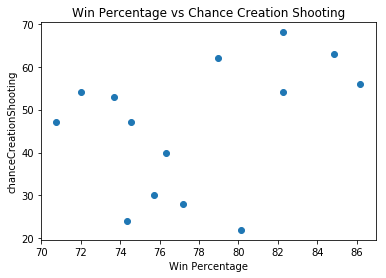

In [539]:
#Winning Percentage vs Chance Creation Shooting

plt.scatter(best_teams['Win_Percentage'],best_teams['chanceCreationShooting'])
plt.xlabel('Win Percentage')
plt.ylabel('chanceCreationShooting')
plt.title('Win Percentage vs Chance Creation Shooting')

In [540]:
#We dont the see the direct positive correlation, but we can somewhat conclude that number of chances created for attack is related to the Wining the game.

Text(0.5,1,'Win Percentage vs Defence Pressure')

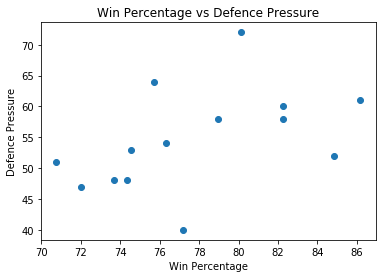

In [541]:
#Winning Percentage vs defencePressure

plt.scatter(best_teams['Win_Percentage'],best_teams['defencePressure'])
plt.xlabel('Win Percentage')
plt.ylabel('Defence Pressure')
plt.title('Win Percentage vs Defence Pressure')

In [ ]:
#From the graph we can see a positive correlation between the winning percentage and the Defence Pressure

Text(0.5,1,'Win Percentage vs Defence Aggression')

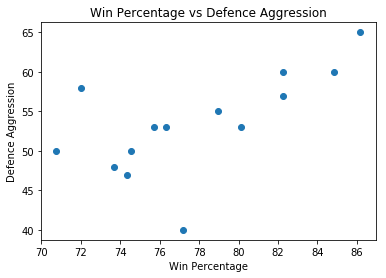

In [542]:
#Winning Percentage vs defenceAggression

plt.scatter(best_teams['Win_Percentage'],best_teams['defenceAggression'])
plt.xlabel('Win Percentage')
plt.ylabel('Defence Aggression')
plt.title('Win Percentage vs Defence Aggression')

In [544]:
#From the graph we can see a positive correlation between the winning percentage and the Defence Aggression

Text(0.5,1,'Win Percentage vs Defence Team Width')

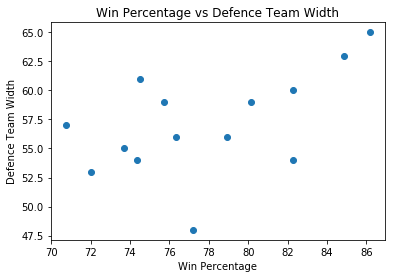

In [545]:
#Winning Percentage vs defenceTeamWidth

plt.scatter(best_teams['Win_Percentage'],best_teams['defenceTeamWidth'])
plt.xlabel('Win Percentage')
plt.ylabel('Defence Team Width')
plt.title('Win Percentage vs Defence Team Width')

In [546]:
#From the graph we can see a positive correlation between the winning percentage and the Defence Team Width

<a id='conclusions'></a>
## Conclusions


### Results
> The soccer data set was very exiting to work with. As a soccer fan I really enjoyed doing this project even thought I had to put an extra mile in cleaning up and merging various tables together. My first analysis revealed that Messi has greater ball skills when compared to Ronaldo. On the other hand, Ronaldo has better physical traits than Messi. Of course things might have changed now, but this analysis is purely based on the dataset that was available. 

> Secondly, When analysed the best players we kinda saw that the players with a higher potential tend to have best overall ratings. Lastly we analysed the best teams overall (not per division or country) and saw that Barcelona has the highest winning percentage based on the dataset followed by Real Madrid. Further analysis tells that there is a strong relation between defense and Winning Percentage. The best teams (overall) had a great defense (Pressure, Aggression, Width e.t.c). 

### Limitations

> There are couple of limitation with the data set
> 1. The inference and conclusion we made from the graphs and dataset. We did not conduct any hypothesis testing or controlled experiments or in other words, did not do inferential statistics
> 2. We were not able to show correlations between some attributes as they were categorical (example: Team Speed: Fast, Normal e.t.c) 
> 3. It is also going to be very difficult to find the correlation between the best player overall ratings and some traits because each player might be playing different position hence, different skill level example a keeper has great/higher skill levels for keeping skills when compared to a striker who will have more skill level for shooting or finishing. 
> 4. Moreover the identified best team is purely based on the dataset, we dont know if there are any data that are missing. If might be different we include data until 2019. 